In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import glob

In [11]:
antenna_files = glob.glob('/home/gbtdata/AGBT17A_259_05/Antenna/2017_*.fits')
antenna_files.sort()
antenna_files = antenna_files[7:-2]

In [12]:
print len(antenna_files)

42


In [13]:
az = []
el = []
ra = []
dec = []
dmjd = []
for fn in antenna_files:
    try:
        f = fits.open(fn)
    except:
        continue
    h = f[2]
    dmjd.extend(h.data['DMJD'])
    az.extend(h.data['MNT_AZ'])
    el.extend(h.data['MNT_EL'])
    ra.extend(h.data['RAJ2000'])
    dec.extend(h.data['DECJ2000'])
    f.close()
az = np.array(az)
el = np.array(el)
ra = np.array(ra)
dec = np.array(dec)
dmjd = np.array(dmjd)

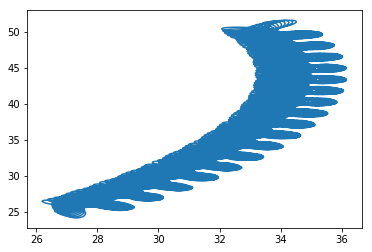

In [14]:
plot(az, el)

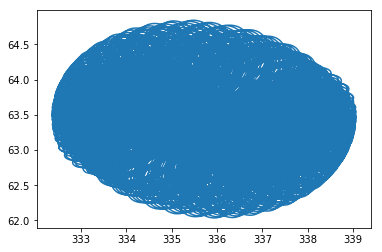

In [15]:
plot(ra, dec)

In [16]:
bins_ra = np.arange(ra.min(), ra.max(),  2.5 / 60.)
bins_dec = np.arange(dec.min(), dec.max(), 2.5 / 60.)
stuff = np.histogram2d(ra, dec, bins=[bins_ra, bins_dec])
histo = stuff[0]

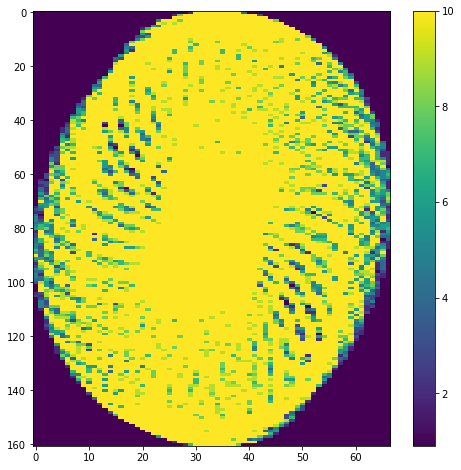

In [17]:
figure(figsize=(8, 8))
imshow(histo, cmap=cm.viridis, aspect='auto')
clim(0.9, 10)
grid(False)
colorbar()

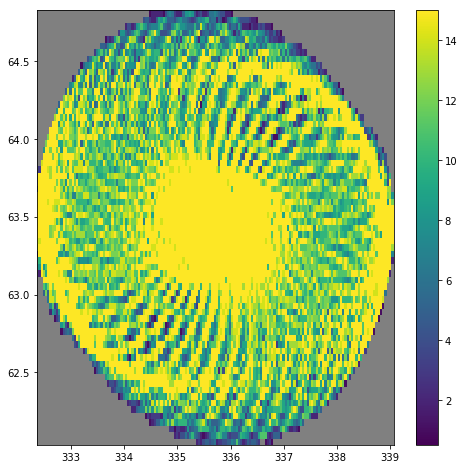

In [19]:
figure(figsize=(8, 8))
pck = pcolormesh(bins_ra, bins_dec, histo.T, cmap=cm.viridis)
pck.cmap.set_under('grey')
clim(0.5, 15)
colorbar()